In [0]:
# Imports
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [0]:
# Download the data
if not (os.path.isfile('train.csv') and os.path.isfile('test.csv')):
  !gdown https://drive.google.com/uc?id=1j8ZNXVrvi_8a-DHaXwPhOu8Bpfhmg2Vv
  # unzip the file
  !unzip digit-recognizer.zip
  !rm -rf digit-recognizer.zip
  !rm -rf sample_submission.csv

In [0]:
# Read the dataset
train_csv_df = pd.read_csv('train.csv')
test_csv_df = pd.read_csv('test.csv')

y_train = np.array(train_csv_df['label'])
X_train = np.array(train_csv_df.drop('label', 1))

X_test = np.array(test_csv_df)


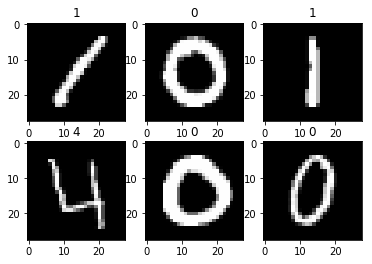

In [138]:
# Plot few image from training dataset
count = 0
for index in range (0, 6):
  plt.subplot(2, 3, count + 1)
  plt.title(y_train[index])
  plt.imshow(X_train[index].reshape(28, 28), cmap="gray")
  count += 1
plt.show()

In [0]:
# Convert training set output to one hot encoding
y_train = np.eye(10)[y_train]

# Normalize the data
X_test = X_test / 255
X_train = X_train / 255

In [140]:
model = Sequential()
model.add(Dense(units = 512, input_dim = 784, activation = 'relu'))
model.add(Dense(units = 330, activation = 'relu'))
model.add(Dense(units = 212, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 152, activation = 'relu'))
model.add(Dense(units = 152, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=6000)

Epoch 1/50
42000/42000 [==============================] - 6s 134us/step - loss: 2.0043 - acc: 0.4330
Epoch 2/50
42000/42000 [==============================] - 4s 94us/step - loss: 0.7946 - acc: 0.7645
Epoch 3/50
42000/42000 [==============================] - 4s 95us/step - loss: 0.4617 - acc: 0.8485
Epoch 4/50
42000/42000 [==============================] - 4s 94us/step - loss: 0.3292 - acc: 0.9012
Epoch 5/50
42000/42000 [==============================] - 4s 93us/step - loss: 0.2598 - acc: 0.9230
Epoch 6/50
42000/42000 [==============================] - 4s 93us/step - loss: 0.2176 - acc: 0.9349
Epoch 7/50
42000/42000 [==============================] - 4s 94us/step - loss: 0.1833 - acc: 0.9453
Epoch 8/50
42000/42000 [==============================] - 4s 95us/step - loss: 0.1595 - acc: 0.9524
Epoch 9/50
42000/42000 [==============================] - 4s 93us/step - loss: 0.1389 - acc: 0.9590
Epoch 10/50
42000/42000 [==============================] - 4s 94us/step - loss: 0.1236 - acc: 0.963

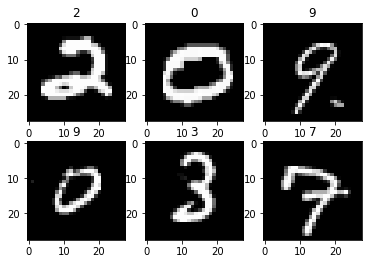

In [143]:
predictions = model.predict(X_test)

# Plot few image from training dataset
count = 0
for index in range (0, 6):
  plt.subplot(2, 3, count + 1)
  plt.title(np.argmax(predictions[index]))
  plt.imshow(X_test[index].reshape(28, 28), cmap="gray")
  count += 1
plt.show()

In [0]:
with open ('output.csv', 'w+') as file:
  file.write('ImageId,Label\n')
  for index in range(X_test.shape[0]):
    file.write('{0},{1}\n'.format(index+1, np.argmax(predictions[index])))

In [0]:
# Got 0.97228 on kaggle